In [3]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import util
from sklearn.datasets import fetch_mldata

%matplotlib inline 

### Download MNIST e separar apenas os exemplos de dígitos 0 e 1

In [4]:
mnist = fetch_mldata('MNIST original') 
vals = set()
for idx, label in enumerate(mnist.target):
    if (label < 2):
        vals.add(idx)
data_mnist = np.array([mnist.data[idx] for idx in vals])
label_mnist = np.array([mnist.target[idx] for idx in vals])
print(data_mnist.shape, label_mnist.shape)

(14780, 784) (14780,)


### Selecionando e visualizando um subdataset com n exemplos

In [9]:
new_data, new_labels = util.get_samples(data_mnist, 
                                        label_mnist, 
                                        size=14780)

In [10]:
util.plot_img_grid(new_data, 
                   new_labels, 
                   max_cols = len(new_labels))

AssertionError: Too many images to display, limit is 20.

### Snippet simples que itera sobre uma lista de vetores de imagem e mostra eles em tela com uma pausa de 1 segundo 

In [ ]:
for i in range(len(new_labels)):
    util.array_imshow(new_data[i], new_labels[i])
    plt.pause(1)
    display.clear_output(wait=True)
    display.display(plt.gcf())

## Exemplo Classificação binária de dígitos com base em regras

#### Analisando as imagens dos dígitos 0 e 1, codifique uma função que receba uma imagem e retorne uma predição em float: 0.0 se o dígito for reconhecido como zero e 1.0 caso contrário

In [11]:
def classifier(flat_img):
    img = util.array2img(flat_img)
    center_img = img[14:17, 13:16] 
    if (np.mean(center_img) > 100):
        return 1.0
    else:
        return 0.0

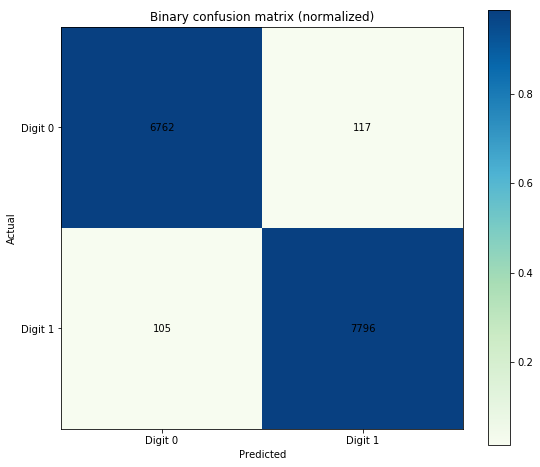

Predicted  False  True  __all__
Actual                         
False       6762   117     6879
True         105  7796     7901
__all__     6867  7913    14780
Evaluation metrics:
population: 14780
P: 7901
N: 6879
PositiveTest: 7913
NegativeTest: 6867
TP: 7796
TN: 6762
FP: 117
FN: 105
TPR: 0.9867105429692444
TNR: 0.9829917139119058
PPV: 0.9852142044736509
NPV: 0.9847094801223242
FPR: 0.0170082860880942
FDR: 0.014785795526349045
FNR: 0.0132894570307556
ACC: 0.984979702300406
F1_score: 0.9859618059946883
MCC: 0.9698129644190152
informedness: 0.9697022568811502
markedness: 0.9699236845959751
prevalence: 0.534573748308525
LRP: 58.013519872525066
LRN: 0.013519398833860954
DOR: 4291.131623931625
FOR: 0.01529051987767584


In [12]:
predictions = []
for i,_ in enumerate(new_data):
    class_prediction = classifier(new_data[i])
    predictions.append(class_prediction)
    
predictions = np.asarray(predictions, 
                         dtype=new_labels.dtype)

util.plot_confusion_matrix_metrics(true_labels=new_labels,
                                   predicted_labels=predictions,
                                   normalized=True)